In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (24,6)

In [3]:
df = pd.read_csv('results/scores.csv')
df = df.dropna()

In [4]:
df

,cycle,task,method,instances,features,classes,accuracy,f1,optimization_time,prediction_time,no_features,best_trial
0,0,data/standardized/c_post-operative.csv,Baseline,87,8,3,0.629630,0.386364,2.384186e-07,0.108851,8.0,0
1,0,data/standardized/c_post-operative.csv,Tree Based Filter,87,8,3,0.481481,0.444118,1.034129e-01,0.107363,4.0,0
2,0,data/standardized/c_post-operative.csv,Tree Based Weighting,87,8,3,0.481481,0.444118,1.034129e-01,0.108998,4.0,0
3,0,data/standardized/c_post-operative.csv,L1 Filter,87,8,3,0.629630,0.386364,2.887011e-03,0.106988,8.0,0
4,0,data/standardized/c_post-operative.csv,ReliefF,87,8,3,0.629630,0.386364,4.911900e-03,0.107256,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5770,24,data/standardized/c_pendigits.csv,Forward Selection,10992,16,10,0.959976,0.959892,1.939362e+01,0.173527,7.0,0
5771,24,data/standardized/c_pendigits.csv,Backwards Selection,10992,16,10,0.980898,0.980789,7.889037e+00,0.277990,15.0,0
5772,24,data/standardized/c_pendigits.csv,Stepwise Selection,10992,16,10,0.970285,0.970091,7.300338e+00,0.175331,10.0,0
5773,24,data/standardized/c_pendigits.csv,Bayesian Selection,10992,16,10,0.982717,0.982628,1.512710e+02,0.577813,16.0,88


In [5]:
df[(df.method=='Baseline') | (df.method=='Bayesian Selection') | (df.method=='Bayesian Weighting')].accuracy.value_counts()

0.666667    21
0.962963    21
0.629630    21
0.955556    21
0.777778    20
            ..
0.622047     1
0.769231     1
0.886320     1
0.803468     1
0.749518     1
Name: accuracy, Length: 388, dtype: int64

In [6]:
df[df.method=='Baseline'].groupby(['cycle','task','method']).mean()

instances  features  \
cycle task                                  method                          
0     data/standardized/c_australian.csv    Baseline        690        14   
      data/standardized/c_balance-scale.csv Baseline        625         4   
      data/standardized/c_breast-tissue.csv Baseline        106         9   
      data/standardized/c_breastcancer.csv  Baseline        569        30   
      data/standardized/c_car.csv           Baseline       1728        21   
...                                                         ...       ...   
24    data/standardized/c_transfusion.csv   Baseline        748         4   
      data/standardized/c_vehicle.csv       Baseline        846        17   
      data/standardized/c_votes.csv         Baseline        435        16   
      data/standardized/c_wine.csv          Baseline        178        13   
      data/standardized/c_yeast.csv         Baseline       1479         8   

                                                      classes  accuracy  \
cycle task                                  method                        
0     data/standardized/c_australian.csv    Baseline        2  0.855769   
      data/standardized/c_balance-scale.csv Baseline        3  0.882979   
      data/standardized/c_breast-tissue.csv Baseline        6  0.562500   
      data/standardized/c_breastcancer.csv  Baseline        2  0.994152   
      data/standardized/c_car.csv           Baseline        4  0.776493   
...                                                       ...       ...   
24    data/standardized/c_transfusion.csv   Baseline        2  0.813333   
      data/standardized/c_vehicle.csv       Baseline        4  0.692913   
      data/standardized/c_votes.csv         Baseline        2  0.931298   
      data/standardized/c_wine.csv          Baseline        3  0.981481   
      data/standardized/c_yeast.csv         Baseline       10  0.578829   

                                                            f1  \
cycle task                                  method               
0     data/standardized/c_australian.csv    Baseline  0.854423   
      data/standardized/c_balance-scale.csv Baseline  0.611342   
      data/standardized/c_breast-tissue.csv Baseline  0.553199   
      data/standardized/c_breastcancer.csv  Baseline  0.993504   
      data/standardized/c_car.csv           Baseline  0.504390   
...                                                        ...   
24    data/standardized/c_transfusion.csv   Baseline  0.703353   
      data/standardized/c_vehicle.csv       Baseline  0.681505   
      data/standardized/c_votes.csv         Baseline  0.929304   
      data/standardized/c_wine.csv          Baseline  0.982445   
      data/standardized/c_yeast.csv         Baseline  0.541698   

                                                      optimization_time  \
cycle task                                  method                        
0     data/standardized/c_australian.csv    Baseline       2.384186e-07   
      data/standardized/c_balance-scale.csv Baseline       2.384186e-07   
      data/standardized/c_breast-tissue.csv Baseline       2.384186e-07   
      data/standardized/c_breastcancer.csv  Baseline       4.768372e-07   
      data/standardized/c_car.csv           Baseline       2.384186e-07   
...                                                                 ...   
24    data/standardized/c_transfusion.csv   Baseline       2.384186e-07   
      data/standardized/c_vehicle.csv       Baseline       2.384186e-07   
      data/standardized/c_votes.csv         Baseline       2.384186e-07   
      data/standardized/c_wine.csv          Baseline       0.000000e+00   
      data/standardized/c_yeast.csv         Baseline       2.384186e-07   

                                                      prediction_time  \
cycle task                                  method                      
0     data/standardized/c_australian.csv    Baseline         0.111243   
      data/standardize

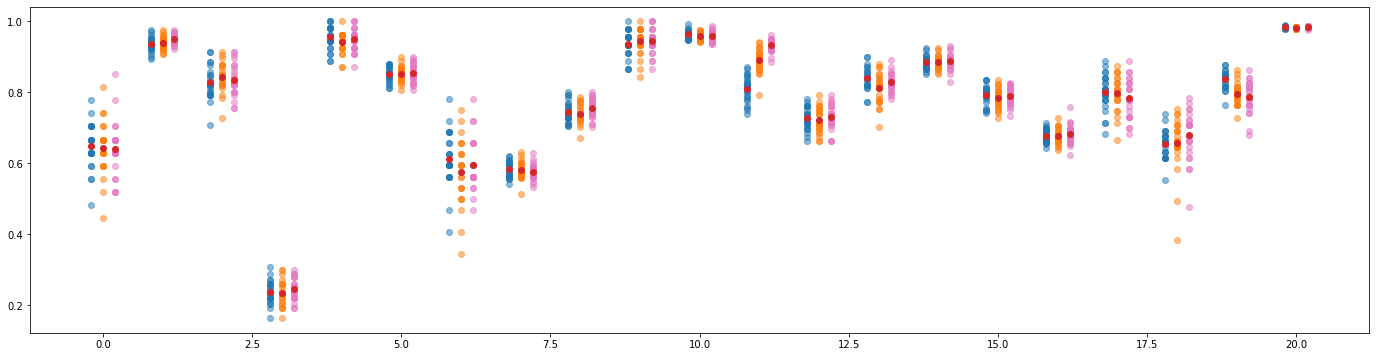

In [9]:
for i, task in enumerate(df.task.unique()):
    plt.scatter([i - 0.2 for _ in range(25)], df[(df.task == task) & (df.method=='Baseline')].accuracy, c='C0', alpha=0.5)
    plt.scatter([i for _ in range(25)], df[(df.task == task) & (df.method=='Bayesian Selection')].accuracy, c='C1', alpha=0.5)
    plt.scatter([i + 0.2 for _ in range(25)], df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy, c='C6', alpha=0.5)
    plt.scatter(i - 0.2, df[(df.task == task) & (df.method=='Baseline')].accuracy.mean(), c='C3')
    plt.scatter(i, df[(df.task == task) & (df.method=='Bayesian Selection')].accuracy.mean(), c='C3')
    plt.scatter(i + 0.2, df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy.mean(), c='C3')

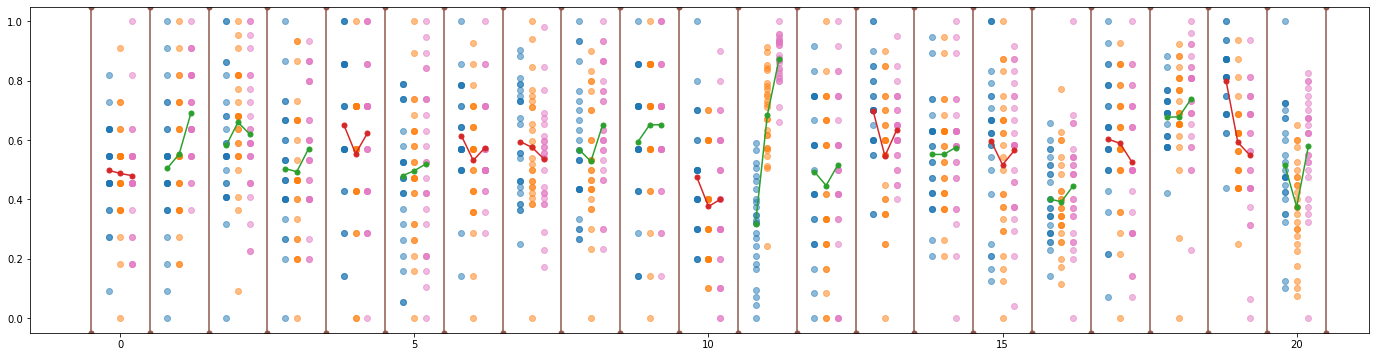

In [11]:
plt.axvline(-0.5, color='C5', marker = 'o', markersize=5)
for i, task in enumerate(df.task.unique()):
    a, b = df[(df.task == task) & (df.method=='Baseline')].accuracy.mean(), df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy.mean()
    lower = df[(df.task == task) & ((df.method=='Baseline') | (df.method=='Bayesian Selection') | (df.method=='Bayesian Weighting'))].accuracy.min()
    higher = df[(df.task == task) & ((df.method=='Baseline') | (df.method=='Bayesian Selection') | (df.method=='Bayesian Weighting'))].accuracy.max()
    delta = higher - lower
    plt.scatter([i-0.2 for _ in range(25)], (df[(df.task == task) & (df.method=='Baseline')].accuracy-lower)/delta, c='C0', alpha=0.5)
    plt.scatter([i for _ in range(25)], (df[(df.task == task) & (df.method=='Bayesian Selection')].accuracy-lower)/delta, c='C1', alpha=0.5)
    plt.scatter([i+0.2 for _ in range(25)], (df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy-lower)/delta, c='C6', alpha=0.5)
    if b > a:
        plt.plot([i-0.2, i, i+0.2], [(df[(df.task == task) & (df.method=='Baseline')].accuracy.mean()-lower)/delta, (df[(df.task == task) & (df.method=='Bayesian Selection')].accuracy.mean()-lower)/delta, (df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy.mean()-lower)/delta], c='C2', marker = 'o', markersize=5)
    else:
        plt.plot([i-0.2, i, i+0.2], [(df[(df.task == task) & (df.method=='Baseline')].accuracy.mean()-lower)/delta, (df[(df.task == task) & (df.method=='Bayesian Selection')].accuracy.mean()-lower)/delta, (df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy.mean()-lower)/delta], c='C3', marker = 'o', markersize=5)
    plt.axvline(i+0.5, color='C5', marker = 'o', markersize=5)

In [12]:
for i, task in enumerate(df.task.unique()):
    a, b = df[(df.task == task) & (df.method=='Baseline')].accuracy.mean(), df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy.mean()
    if a > b + 0.01:
        print(task, a, b, a > b)

data/standardized/c_breast-tissue.csv 0.6125 0.595 True
data/standardized/c_ecoli.csv 0.841188118811881 0.8285148514851487 True
data/standardized/c_sonar.csv 0.8006349206349205 0.7834920634920635 True
data/standardized/c_heart.csv 0.8370370370370369 0.7876543209876543 True


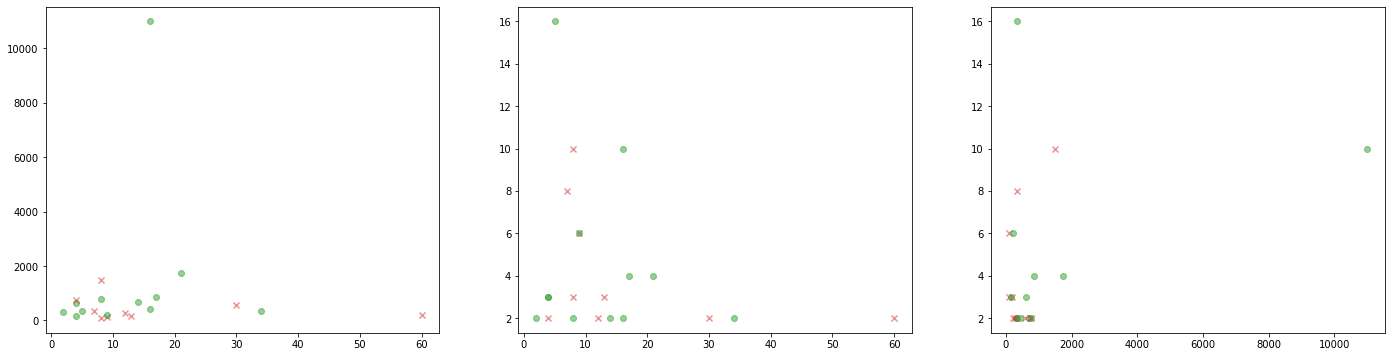

In [13]:
plt.subplot(1,3,1)
for i, task in enumerate(df.task.unique()):
    a, b = df[(df.task == task) & (df.method=='Baseline')].accuracy.mean(), df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy.mean()
    nfeatures, ninstances, nclasses = df[(df.task == task)].iloc[0].features, df[(df.task == task)].iloc[0].instances, df[(df.task == task)].iloc[0].classes
    if a > b:
        plt.scatter(nfeatures, ninstances, color = 'C3', marker='x', alpha=0.5)
    else:
        plt.scatter(nfeatures, ninstances, color = 'C2', alpha=0.5)
plt.subplot(1,3,2)
for i, task in enumerate(df.task.unique()):
    a, b = df[(df.task == task) & (df.method=='Baseline')].accuracy.mean(), df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy.mean()
    nfeatures, ninstances, nclasses = df[(df.task == task)].iloc[0].features, df[(df.task == task)].iloc[0].instances, df[(df.task == task)].iloc[0].classes
    if a > b:
        plt.scatter(nfeatures, nclasses, color = 'C3', marker='x', alpha=0.5)
    else:
        plt.scatter(nfeatures, nclasses, color = 'C2', alpha=0.5)
plt.subplot(1,3,3)
for i, task in enumerate(df.task.unique()):
    a, b = df[(df.task == task) & (df.method=='Baseline')].accuracy.mean(), df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy.mean()
    nfeatures, ninstances, nclasses = df[(df.task == task)].iloc[0].features, df[(df.task == task)].iloc[0].instances, df[(df.task == task)].iloc[0].classes
    if a > b:
        plt.scatter(ninstances, nclasses, color = 'C3', marker='x', alpha=0.5)
    else:
        plt.scatter(ninstances, nclasses, color = 'C2', alpha=0.5)

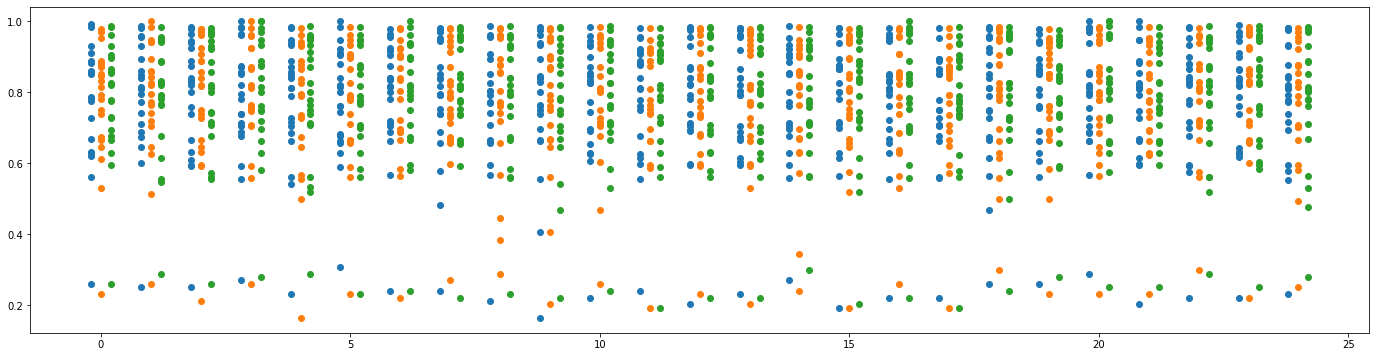

In [14]:
plt.scatter(df[df.method=='Baseline'].cycle - 0.2, df[df.method=='Baseline'].accuracy)
plt.scatter(df[df.method=='Bayesian Selection'].cycle, df[df.method=='Bayesian Selection'].accuracy)
plt.scatter(df[df.method=='Bayesian Weighting'].cycle + 0.2, df[df.method=='Bayesian Weighting'].accuracy)

In [15]:
for method in df.method.unique():
    print(method.ljust(30), df[df.method==method].accuracy.mean(), df[df.method==method].f1.mean())

Baseline                       0.7764625376337159 0.6827580295587207
Tree Based Filter              0.7346356884987593 0.6279825004887079
Tree Based Weighting           0.7411338627600309 0.6371607438180145
L1 Filter                      0.7705192546054397 0.6768751380970383
ReliefF                        0.7599932917129945 0.6623960132336656
ReliefF Weighting              0.7460037854029188 0.6492836196821303
Forward Selection              0.7502002289546517 0.6305629509318758
Backwards Selection            0.7774292773505747 0.6933850813834727
Stepwise Selection             0.769611828154497 0.6779089709720879
Bayesian Selection             0.7741780512385763 0.6799225915730417
Bayesian Weighting             0.7809016439997551 0.6956353920461547


In [16]:
ndf = df[df.features < 20]
for method in ndf.method.unique():
    print(method.ljust(30), ndf[ndf.method==method].accuracy.mean(), ndf[ndf.method==method].f1.mean())

Baseline                       0.7589919462749046 0.6648448386917077
Tree Based Filter              0.7201684132454858 0.6203861635273267
Tree Based Weighting           0.7243704186907153 0.6222920216230377
L1 Filter                      0.7487994325080475 0.6456974695629077
ReliefF                        0.7379994547554184 0.6362287381607732
ReliefF Weighting              0.7193494341819517 0.6150875663928059
Forward Selection              0.7403397845256083 0.6230849565455349
Backwards Selection            0.753248047193458 0.6635637850483801
Stepwise Selection             0.7479038382234141 0.651468765144233
Bayesian Selection             0.7509858916576915 0.6474212232091522
Bayesian Weighting             0.7580390730592856 0.6613776708635921
